In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

In [2]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [3]:
from pyod.utils.data import generate_data, get_outliers_inliers

In [4]:
#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

In [5]:
# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

In [6]:
# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

In [8]:
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

In [9]:
#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

In [10]:
# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

Text(0, 0.5, 'F2')

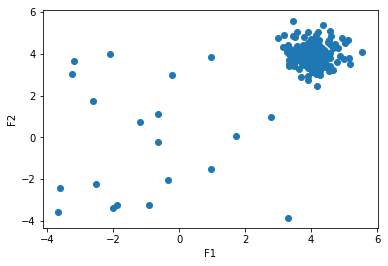

In [11]:
# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

In [12]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

In [13]:
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)


<Figure size 720x720 with 0 Axes>

In [14]:
# predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

IndentationError: unexpected indent (<ipython-input-14-708241601980>, line 2)